# Purpose
Here, we intend to verify that the 1-spingroup Encore algorithms converges to the 2-spingroup Encore algorithms when the one spingroup is very infrequent (i.e. low level-density).

# Importing Modules

In [1]:
import sys
sys.path.append('../')

import Levels
import Results
from RMatrix import PTBayes
import Resonances
from SpinGroups import SpinGroups

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, edgeitems=9, linewidth=130)

In [2]:
%matplotlib widget

# WigBayes Test

#### Gathering Mean Parameters

In [3]:
eps = 0.005 # ...

A  = 181
EB = (1e-5,5000)
pM    = [0.12547, 0.14404]
FreqF = 1.0/6.0
Freq  = [(1-eps)/4.3166, eps/4.3166]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]

# 2 Spingroup Case:
SGs = SpinGroups.make(l, j)
MP2 = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, FreqF=FreqF)

# 1 Spingroup Case:
SGs = SpinGroups.make(l[:1], j[:1])
MP1 = Resonances.MeanParameters(Freq=Freq[:1], Gnm=Gnm[:1], nDOF=dfn[:1], Ggm=Ggm[:1], gDOF=dfg[:1], A=A, sg=SGs, EB=EB, FreqF=FreqF)

#### Sampler

In [4]:
Res, Types, Missed_Res, Missed_Types = MP2.sample()

#### Running 1-Spingroup WigBayes

In [5]:
Prior, TPPrior = PTBayes(Res, MP1)
distributions = MP1.distributions('Wigner')
runMaster = Levels.RunMaster(Res.E, MP1.EB, distributions, MP1.FreqF, Prior, TPPrior)
Posterior_1, log_total_probability_1 = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


#### Running 2-Spingroup WigBayes

In [7]:
Prior, TPPrior = PTBayes(Res, MP2)
distributions = MP2.distributions('Wigner')
runMaster = Levels.RunMaster(Res.E, MP1.EB, distributions, MP1.FreqF, Prior, TPPrior)
Posterior_2, log_total_probability_2 = runMaster.WigBayes(return_log_tot_prob=True, verbose=True)

Preparing level-spacings
Finished level-spacing calculations
Finished CP calculation
Finished WigBayes calculation


### Comparison

Average Error for True Probability  = 0.00152
Average Error for False Probability = 0.00201



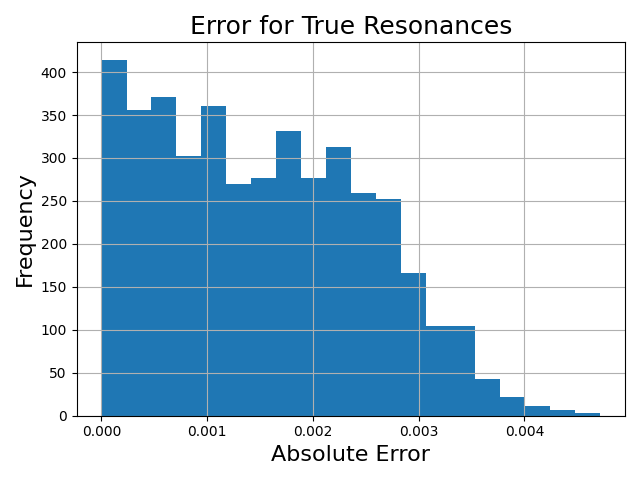

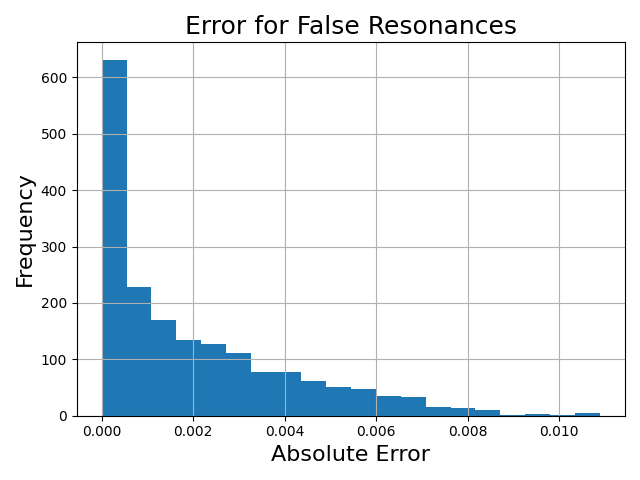

In [ ]:
abs_err_true  = abs(Posterior_2[:,0] - Posterior_1[:,0])
abs_err_false = abs(Posterior_2[:,2] - Posterior_1[:,1])

average_err_true  = np.mean(abs_err_true)
average_err_false = np.mean(abs_err_false)

print(f'Average Error for True Probability  = {average_err_true:.5f}')
print(f'Average Error for False Probability = {average_err_false:.5f}')
print()

plt.figure(1)
plt.clf()
plt.hist(abs_err_true, bins=20, density=True)
plt.grid()
plt.title('Error for True Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(2)
plt.clf()
plt.hist(abs_err_false, bins=20, density=True)
plt.grid()
plt.title('Error for False Resonances', fontsize=18)
plt.xlabel('Absolute Error', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

### Comparing Posteriors:

In [ ]:
print('True Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,:1], Posterior_2[:,:1]), axis=1))
print()
print('False Spingroup Posterior:')
print(np.concatenate((Posterior_1[:,1:], Posterior_2[:,2:]), axis=1))

True Spingroup Posterior:
[[0.930815 0.930129]
 [0.996801 0.996795]
 [0.64402  0.643443]
 [0.533147 0.531818]
 [0.731204 0.730261]
 [0.46424  0.465996]
 [0.463359 0.460523]
 [0.508217 0.508107]
 [0.531864 0.530553]
 ...
 [0.947248 0.946656]
 [0.98353  0.983344]
 [0.971794 0.971497]
 [0.684077 0.68183 ]
 [0.663563 0.663886]
 [0.737572 0.737419]
 [0.730344 0.728361]
 [0.830747 0.829427]
 [0.865322 0.864227]]

False Spingroup Posterior:
[[0.069185 0.069128]
 [0.003199 0.003178]
 [0.35598  0.353012]
 [0.466853 0.462967]
 [0.268796 0.267687]
 [0.53576  0.531449]
 [0.536641 0.532849]
 [0.491783 0.487884]
 [0.468136 0.464681]
 ...
 [0.052752 0.052701]
 [0.01647  0.016471]
 [0.028206 0.028177]
 [0.315923 0.314425]
 [0.336437 0.334032]
 [0.262428 0.260866]
 [0.269656 0.268466]
 [0.169253 0.168607]
 [0.134678 0.134289]]
